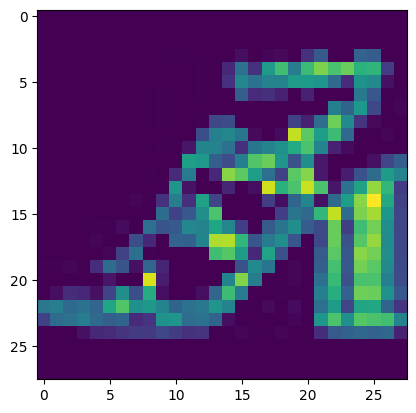

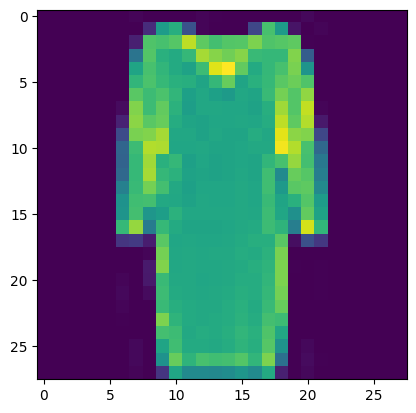

Epoch 1/3
1875/1875 [==============================] - 170s 89ms/step - loss: 0.5929 - accuracy: 0.8322 - val_loss: 0.4219 - val_accuracy: 0.8527
Epoch 2/3
1875/1875 [==============================] - 159s 85ms/step - loss: 0.3365 - accuracy: 0.8785 - val_loss: 0.3763 - val_accuracy: 0.8634
Epoch 3/3
313/313 [==============================] - 6s 20ms/step
0.8742


In [3]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Flatten, Dense
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import accuracy_score
import numpy as np
nc = 10 # Number of classes

#This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
#along with a test set of 10,000 images. This dataset can be used as a drop-in
#replacement for MNIST.
(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtest[nr.randint(10000)])
plt.show()

Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)
ytrainEnc = tf.one_hot(ytrain, depth=nc)
ytestEnc = tf.one_hot(ytest, depth=nc)
model=Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xtrain, ytrainEnc,validation_data=(Xtest,ytestEnc), epochs=3)
ypred=model.predict(Xtest)
ypred=np.argmax(ypred,axis=1)
score=accuracy_score(ypred,ytest)
print(score)